<h1>Problem 2. Train a machine learning model using the training file to predict the values of the ‘tat_in_days’ column for the test file. ( Evaluation on the basis on RMSE score)
</h1>

In [3071]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

In [3072]:
train_data=pd.read_csv('problem_2_train.csv',parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
#df=train_data.groupby('Dataset').describe()
train_data.head(10)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8
5,2852784,AN,21,110015,233,233,131,B,ADLD,132001,2017-12-22,2017-12-17,2018-02-08,4580,2018-02-15,9
6,2844713,C,2,110018,233,233,131,A,ADLD,110059,2017-08-26,2017-08-22,2018-02-06,4094,2018-02-09,15
7,2829719,C,6,160059,233,233,131,B,ADLD,151001,2017-03-14,2017-03-13,2018-02-01,4549,2018-02-10,16
8,2833619,AN,3,560011,201,233,131,A,ADLD,560076,2017-07-23,2017-07-22,2018-02-03,4467,2018-02-08,17
9,2870579,AJ,5,380009,233,233,131,B,ADLD,390006,2017-06-01,2017-05-31,2018-02-14,4422,2018-02-20,11


<h1> The problem is Regression problem because the data of dependent variable i.e 'tat' is continuous </h1>

<h2> First of all ,checking for outliers </h2>

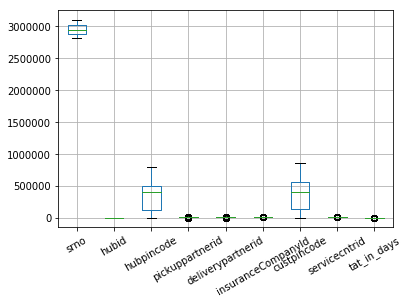

In [3073]:
train_data.boxplot()

plt.xticks(rotation=30)
plt.show()

<h2> No outliers in the data </h2>

<h3> Cleaning the data.....Handling categorical data (Replacing existing categorical columns)</h3>

In [3074]:
mob_arr=train_data.mobmake.unique()

In [3075]:
mob_list=list(mob_arr)
len_mob=len(mob_list)
len_mob

38

In [3076]:
mob_dict={}

for i in range(0,len_mob):
    mob_dict[mob_arr[i]]=i


In [3077]:
train_data['mobmake']=train_data.mobmake.map(mob_dict)


In [3078]:
train_data.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [3079]:
train_data.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [3080]:
train_data['custpincodecategory']=train_data.custpincodecategory.map({'0':0,'A':1,'B':2,'C':3,'D':4})

In [3081]:
train_data['claimtype']=train_data.claimtype.map({'ADLD':1,'EW':2})

In [3082]:
type(train_data['mobilepurchasedate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [3083]:
train_data['mobilepurchasedate']=train_data.mobilepurchasedate.dt.day
#train_data['mobilepurchasedate']

In [3084]:
train_data['claimintdate']=train_data.claimintdate.dt.day

In [3085]:
train_data['pickupStartdate']=train_data.pickupStartdate.dt.day
train_data['memcreateddate']=train_data.memcreateddate.dt.day
train_data['diff_date']=train_data['pickupStartdate']-train_data['claimintdate']

In [3086]:
#train_data.groupby('tat_in_days').describe
#train_data.query('claimtype==1')
#train_data.drop(['pickuppartnerid','deliverypartnerid','claimtype','srno'],axis=1,inplace=True)
# train_data.drop('deliverypartnerid',axis=1)
# train_data.drop('claimtype',axis=1)
# train_data.drop('srno',axis=1)


In [3087]:
# dataset=train_data.sort_values('mobmake')

# dataset.shape
train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,diff_date
0,2851218,0,7,500004,233,233,131,1,1,500001,27,2,8,4403,13,5,5
1,2838330,1,10,226010,233,233,131,1,1,226022,6,5,4,4444,8,12,4
2,2835781,1,2,110018,233,233,228,1,1,110018,1,27,3,4388,12,9,9
3,2838589,2,2,110018,233,233,228,2,1,124001,17,31,4,4092,14,9,10
4,2855214,0,21,110015,233,233,131,1,1,201301,23,20,9,4580,14,8,5


<h3> Heatmap </h3>

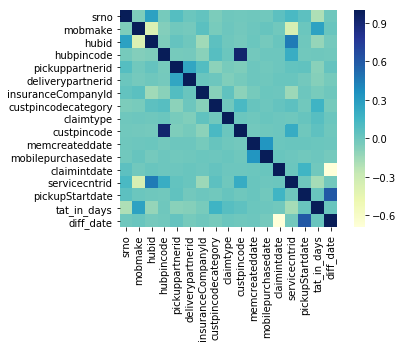

In [3088]:
correlations=train_data.corr()
sb.heatmap(correlations,square=True,cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

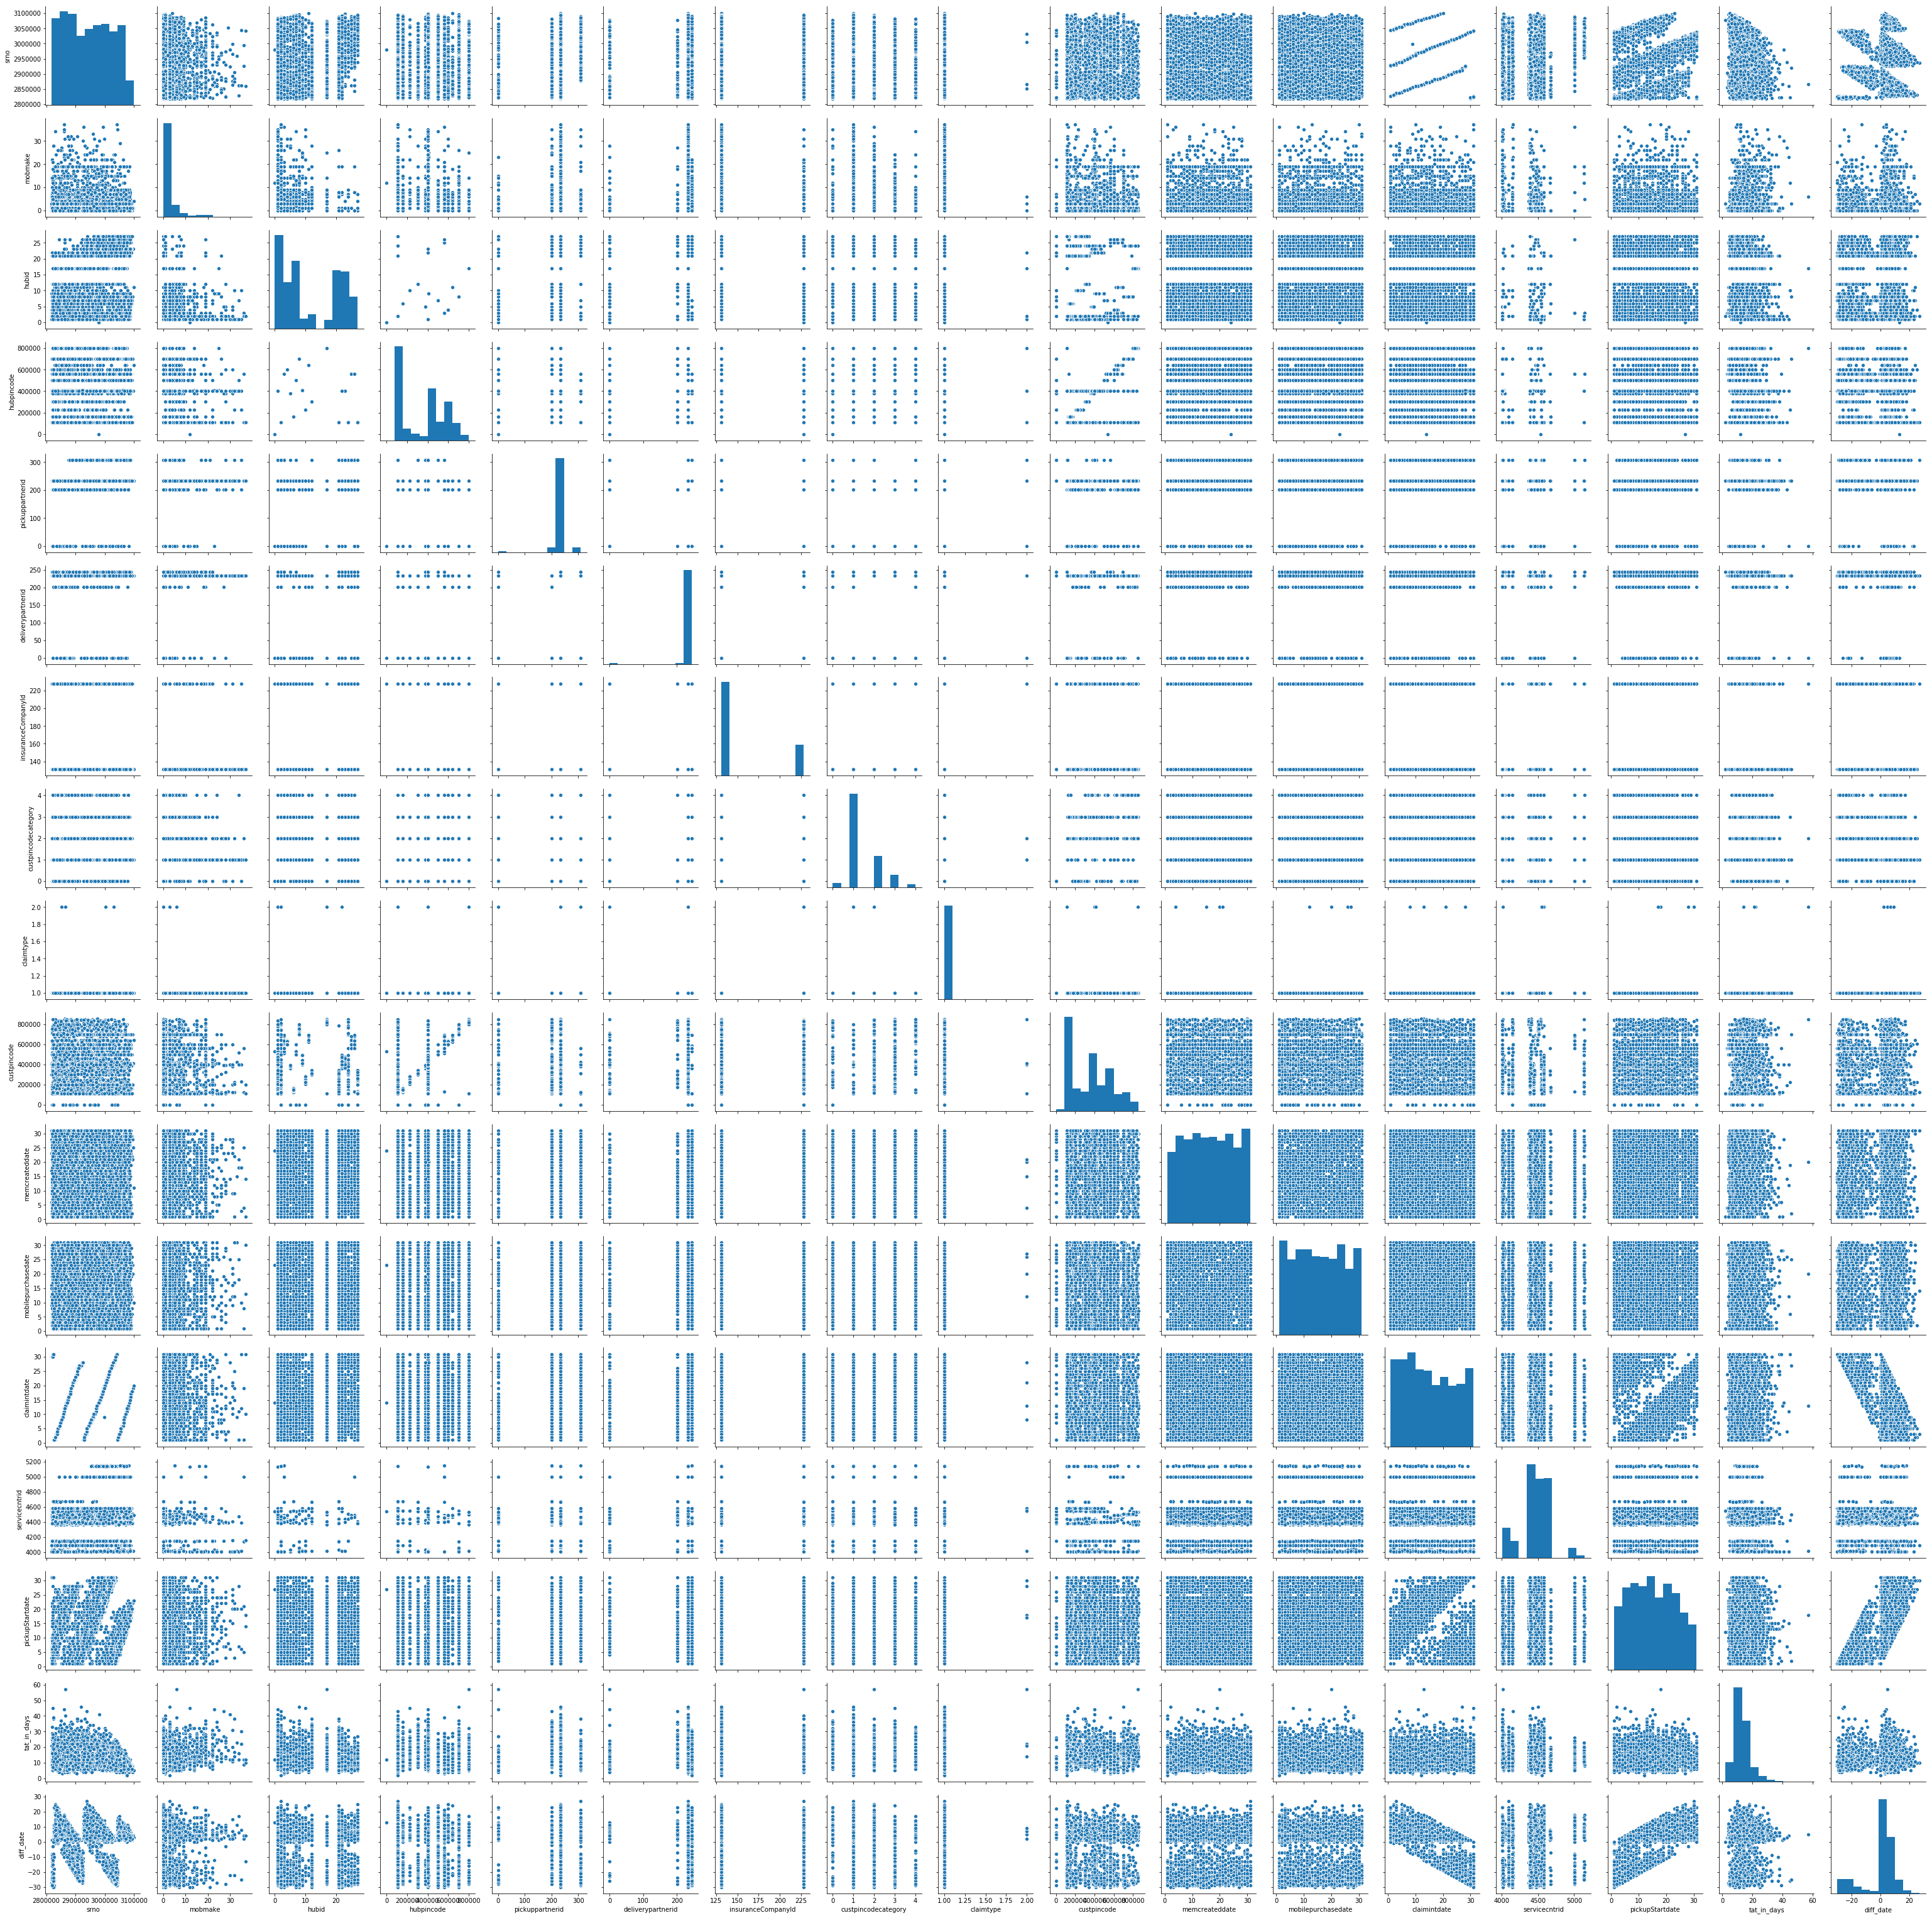

In [3089]:
sb.pairplot(train_data)

<h2> Choosing the featured cols (from independent cols) </h2>

In [3090]:
#X=train_data.iloc[:,0:15]  4.90
feature_cols=[ 'mobmake', 'insuranceCompanyId', 'custpincodecategory','claimtype', 'custpincode',
         'memcreateddate', 'mobilepurchasedate',
       'claimintdate',  'pickupStartdate','diff_date']
feature_cols   #best 1.24

# feature_cols=[ 'mobmake', 'insuranceCompanyId', 'custpincodecategory','claimtype',
#           'mobilepurchasedate',
#        'claimintdate',  'pickupStartdate','diff_date']
# feature_cols

['mobmake',
 'insuranceCompanyId',
 'custpincodecategory',
 'claimtype',
 'custpincode',
 'memcreateddate',
 'mobilepurchasedate',
 'claimintdate',
 'pickupStartdate',
 'diff_date']

In [3091]:
X=train_data[feature_cols]
#X  
X.head()         # Independent variables

,mobmake,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,pickupStartdate,diff_date
0,0,131,1,1,500001,27,2,8,13,5
1,1,131,1,1,226022,6,5,4,8,4
2,1,228,1,1,110018,1,27,3,12,9
3,2,228,2,1,124001,17,31,4,14,10
4,0,131,1,1,201301,23,20,9,14,5


In [3092]:
y=train_data.iloc[:,-1]         # dependent variable

In [3093]:
#train_data.groupby('mobmake').describe()

In [3094]:
X.shape

(6250, 10)

In [3095]:
y.shape

(6250,)

<h2>Now Training the data using Linear Regression Algorithm </h2>

In [3096]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score



In [3097]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.25) # ratio of training and testing data is 75:25

In [3098]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(4687, 10)
(4687,)
(1563, 10)
(1563, 10)


In [3099]:
lnreg=LinearRegression()
lnreg.fit(X_train,y_train)
y_pred=lnreg.predict(X_test)
# for i in y_pred:
#     print(i)

In [3100]:
lnreg.intercept_

-1.684763439868675e-14

In [3101]:
lnreg.coef_

array([ 2.59278012e-16, -1.84802260e-16,  1.88597346e-15,  3.18619864e-14,
        2.71050543e-20, -1.77694082e-16,  7.42130138e-17, -3.33333333e-01,
        3.33333333e-01,  6.66666667e-01])

In [3102]:
list(zip(feature_cols,lnreg.coef_))  

[('mobmake', 2.5927801209107207e-16),
 ('insuranceCompanyId', -1.8480226030015423e-16),
 ('custpincodecategory', 1.885973462510958e-15),
 ('claimtype', 3.186198636276213e-14),
 ('custpincode', 2.710505431213761e-20),
 ('memcreateddate', -1.7769408160914134e-16),
 ('mobilepurchasedate', 7.421301377168e-17),
 ('claimintdate', -0.3333333333333329),
 ('pickupStartdate', 0.3333333333333331),
 ('diff_date', 0.6666666666666664)]

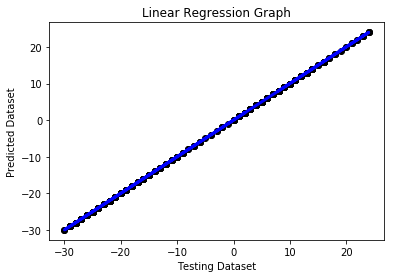

In [3103]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test,y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Graph")
plt.xlabel("Testing Dataset")
plt.ylabel("Predicted Dataset")
plt.show()

<h2> Calculating Root Mean Square Error(RMSE) </h2>

In [3104]:
rmse=np.sqrt(((y_test - y_pred) ** 2).mean())
rmse

1.249114692025711e-14

In [3105]:
lnreg.score(X_test,y_test)

1.0

<h1> Testing data(from test.csv) </h1>

In [3106]:
test_data=pd.read_csv('problem_2_test.csv',parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [3107]:
mob_arr=test_data.mobmake.unique()

In [3108]:
mob_list=list(mob_arr)
len_mob=len(mob_list)
len_mob

34

In [3109]:
mob_dict={}

for i in range(0,len_mob):
    mob_dict[mob_arr[i]]=i


In [3110]:
test_data['mobmake']=test_data.mobmake.map(mob_dict)
#train_data['mobmake']
#train_data.head()

In [3111]:
test_data['custpincodecategory']=test_data.custpincodecategory.map({'0':0,'A':1,'B':2,'C':3,'D':4})

In [3112]:
test_data['claimtype']=test_data.claimtype.map({'ADLD':1,'EW':2})

In [3113]:
test_data['mobilepurchasedate']=test_data.mobilepurchasedate.dt.day
#train_data['mobilepurchasedate']

In [3114]:
test_data['claimintdate']=test_data.claimintdate.dt.day

In [3115]:
test_data['pickupStartdate']=test_data.pickupStartdate.dt.day
test_data['memcreateddate']=test_data.memcreateddate.dt.day
test_data['diff_date']=test_data['pickupStartdate']-test_data['claimintdate']

In [3116]:
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,diff_date
0,2829088,0,3,560011,233,233,131,1,1,560093,30,27,1,4467,6,5
1,2829866,1,2,110018,233,233,228,1,1,110034,17,25,1,4388,8,7
2,2894489,1,3,560011,233,233,228,3,1,590014,12,11,21,4460,28,7
3,2876708,1,2,110018,233,233,228,2,1,250110,7,21,16,4388,26,10
4,2890283,0,22,400104,233,233,131,3,1,496001,10,22,20,4581,23,3


In [3117]:
#X=train_data.iloc[:,0:15]  4.90
feature_cols=[ 'mobmake', 'insuranceCompanyId', 'custpincodecategory','claimtype', 'custpincode',
         'memcreateddate', 'mobilepurchasedate',
       'claimintdate',  'pickupStartdate','diff_date']
feature_cols


['mobmake',
 'insuranceCompanyId',
 'custpincodecategory',
 'claimtype',
 'custpincode',
 'memcreateddate',
 'mobilepurchasedate',
 'claimintdate',
 'pickupStartdate',
 'diff_date']

In [3118]:
test_X=test_data[feature_cols]
test_X.shape

(2116, 10)

In [3119]:
# Predicting 'tat value on test.csv data'

pred_tat=lnreg.predict(test_X)
pred_tat


array([  5.,   7.,   7., ...,   6., -25.,   6.])

In [3120]:
type(pred_dataset)

numpy.ndarray

In [3121]:
for i in pred_dataset:
    print(i)

5.000000000000003
6.999999999999974
6.999999999999995
9.999999999999984
3.0000000000000107
4.999999999999999
-5.000000000000019
6.99999999999998
8.999999999999991
4.000000000000003
5.999999999999992
5.000000000000007
5.999999999999995
4.000000000000004
4.999999999999998
2.9999999999999982
8.000000000000004
5.999999999999974
9.999999999999995
10.999999999999973
0.9999999999999907
-25.999999999999975
3.9999999999999956
-22.999999999999975
-23.99999999999998
2.0000000000000036
-26.999999999999968
4.000000000000014
1.9999999999999956
4.000000000000003
-28.999999999999975
3.0000000000000173
11.999999999999998
-23.99999999999997
8.000000000000005
5.000000000000002
4.000000000000006
13.999999999999991
4.000000000000005
3.999999999999999
6.999999999999995
3.0000000000000124
-17.999999999999996
7.000000000000001
5.000000000000008
2.0000000000000053
4.999999999999992
7.999999999999985
3.9999999999999782
3.000000000000008
3.9999999999999947
6.0
1.9999999999999916
-12.000000000000004
0.99999999999

4.000000000000004
8.999999999999991
8.00000000000001
2.0000000000000036
2.0000000000000195
1.9999999999999991
3.000000000000001
-27.999999999999982
-24.999999999999993
3.999999999999994
2.000000000000017
-25.999999999999982
2.9999999999999876
4.000000000000003
13.999999999999995
9.999999999999973
2.9999999999999996
2.9999999999999982
-13.999999999999972
1.9999999999999964
2.9999999999999947
-13.99999999999998
2.0000000000000036
3.9999999999999885
6.000000000000001
3.9999999999999973
23.999999999999968
3.9999999999999902
5.000000000000006
2.000000000000007
3.000000000000014
2.000000000000016
2.0000000000000036
8.000000000000018
12.999999999999973
5.000000000000003
3.000000000000016
3.99999999999998
4.000000000000004
8.999999999999993
-24.999999999999982
7.999999999999994
2.0000000000000124
0.9999999999999812
-24.999999999999982
2.9999999999999982
-25.999999999999975
4.0000000000000115
-25.99999999999999
-25.99999999999999
0.9999999999999964
9.99999999999998
7.9999999999999885
8.99999999

4.000000000000003
3.000000000000001
10.000000000000014
-26.999999999999982
-0.9999999999999923
4.00000000000001
2.0000000000000027
6.0000000000000115
11.999999999999998
3.000000000000007
2.999999999999993
2.9999999999999916
4.999999999999998
2.999999999999974
-6.99999999999999
22.99999999999999
2.0000000000000058
3.0000000000000053
-25.999999999999975
2.0000000000000115
0.9999999999999862
5.000000000000004
5.999999999999993
3.000000000000001
3.0000000000000018
-20.99999999999998
1.0000000000000075
4.0000000000000115
4.000000000000011
-11.999999999999996
3.000000000000008
2.0000000000000053
3.9999999999999827
11.999999999999991
5.0
2.9999999999999925
3.999999999999973
5.999999999999994
6.000000000000003
2.9999999999999964
1.0000000000000102
5.000000000000005
-20.999999999999996
4.000000000000005
6.0
-24.0
2.999999999999991
-23.999999999999982
-23.999999999999986
2.000000000000009
2.0000000000000124
3.0000000000000107
5.000000000000003
2.999999999999998
-23.999999999999986
2.999999999999

In [3122]:
test_data['tat_in_days']=pred_tat

In [3123]:
test_data.to_csv("problem2_new_test.csv")    #saving the predicted tat value in the new csv file 